---

_You are currently looking at **version 0.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the Jupyter Notebook FAQ course resource._

---

In [3]:
import numpy as np
import pandas as pd

### Question 1
Import the data from `assets/fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [4]:
def answer_one():
    # YOUR CODE HERE
    df = pd.read_csv('assets/fraud_data.csv')
    df_fraud = df[df['Class'] == 1]
    return len(df_fraud) / len(df) 
    raise NotImplementedError()
answer_one()

0.016410823768035772

In [6]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('assets/fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [8]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score
    from sklearn.metrics import accuracy_score
    
    # YOUR CODE HERE
    dummy_clf = DummyClassifier(strategy='most_frequent')
    dummy_clf.fit(X_train, y_train)
    y_pred = dummy_clf.predict(X_test)
    
    return (accuracy_score(y_pred, y_test), recall_score(y_pred, y_test))
    raise NotImplementedError()
answer_two()

(0.9852507374631269, 0.0)

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [10]:
def answer_three():
    from sklearn.metrics import recall_score, precision_score, accuracy_score
    from sklearn.svm import SVC
    
    # YOUR CODE HERE
    svc = SVC()
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    
    return (accuracy_score(y_test, y_pred), recall_score(y_test, y_pred), precision_score(y_test, y_pred))
    raise NotImplementedError()
    
answer_three()

(0.9900442477876106, 0.35, 0.9333333333333333)

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [15]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC
    
    # YOUR CODE HERE
    svc = SVC(C=1e9, gamma=1e-07)
    svc.fit(X_train, y_train)
    
    decision_values = svc.decision_function(X_test)
    y_pred_with_threshold = decision_values > -220
    confusion = confusion_matrix(y_test, y_pred_with_threshold)
    return confusion
    raise NotImplementedError()
answer_four()

array([[5320,   24],
       [  14,   66]])

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

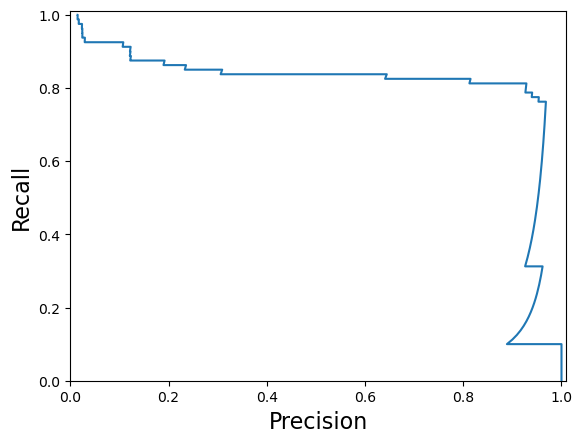

In [27]:
# YOUR CODE HERE 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
    
log = LogisticRegression().fit(X_train, y_train)
y_scores_log = log.decision_function(X_test)
precision, recall, _ = precision_recall_curve(y_test, y_scores_log)
    
import matplotlib.pyplot as plt
plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.show();
    
def answer_five():
    # return values based on 2 charts above
    return (0.83,0.9)
#raise NotImplementedError()

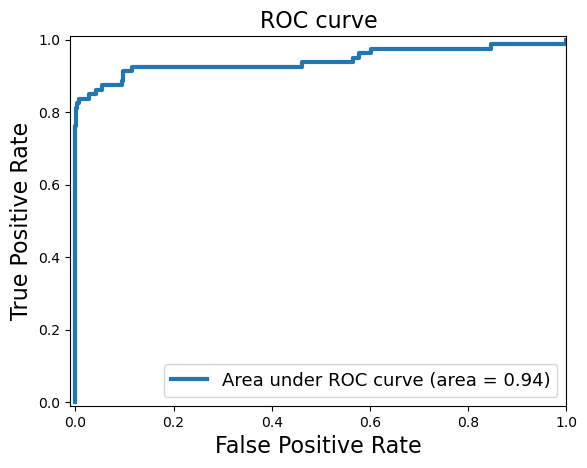

In [36]:
from sklearn.metrics import roc_curve, auc

fpr_log, tpr_log, _ = roc_curve(y_test, y_scores_log)
roc_auc_log = auc(fpr_log, tpr_log)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_log, tpr_log, lw=3, label='Area under ROC curve (area = {:0.2f})'.format(roc_auc_log))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.show();

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation. (Suggest to use `solver='liblinear'`, more explanation [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html))

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|

<br>

*This function should return a 4 by 2 numpy array with 8 floats.* 

*Note: do not return a DataFrame, just the values denoted by `?` in a numpy array.*

In [ ]:
def answer_six():    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression

    # YOUR CODE HERE
    clf = LogisticRegression()
    grid_values = {'penalty': ['l1', 'l2'], 'C':[0.01, 0.1, 1, 10], 'solver':['liblinear']}
    grid_clf_acc = GridSearchCV(clf, param_grid = grid_values, scoring = 'recall', cv=3)
    grid_clf_acc.fit(X_train, y_train)
    
    return grid_clf_acc.cv_results_['mean_test_score'].reshape(4, 2)
    raise NotImplementedError()
    
answer_six()

In [ ]:
# Use the following function to help visualize results from the grid search
%matplotlib inline
def GridSearch_Heatmap(scores):
    %matplotlib inline
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(4,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10])
    plt.yticks(rotation=0);

GridSearch_Heatmap(answer_six())